In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
df_train = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')

In [112]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [113]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [114]:
for i in df_train.columns:
  print(i,df_train[i].nunique())

Item_Identifier 1559
Item_Weight 415
Item_Fat_Content 5
Item_Visibility 7880
Item_Type 16
Item_MRP 5938
Outlet_Identifier 10
Outlet_Establishment_Year 9
Outlet_Size 3
Outlet_Location_Type 3
Outlet_Type 4
Item_Outlet_Sales 3493


In [115]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [116]:
df_train.isnull().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [118]:
df_train['Item_Weight'].mean()
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(), inplace=True)
df_train['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [119]:
df_outlet_size = df_train.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
print(df_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [120]:
df_train_mis_val = df_train['Outlet_Size'].isnull()   

In [122]:
df_train.loc[miss_values, 'Outlet_Size'] = df_train.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [87]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [13]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [14]:
df=pd.concat([df_train,df_test], ignore_index=True)
print(df.shape)
df.head()

(14204, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [15]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Univariate Analysis

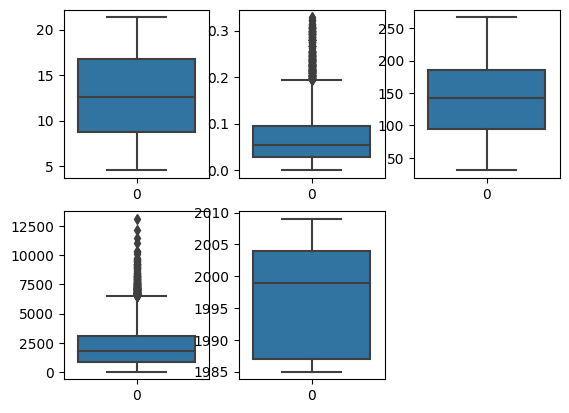

In [16]:
num_cols=['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales', 'Outlet_Establishment_Year']
it=1

for i in num_cols:
    plt.subplot(2,3,it)
    sns.boxplot(df[i])
    it+=1
plt.show()

<ipython-input-43-b429aa3a1fe2>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
<ipython-input-43-b429aa3a1fe2>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
<ipython-input-43-b429aa3a1fe2>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.

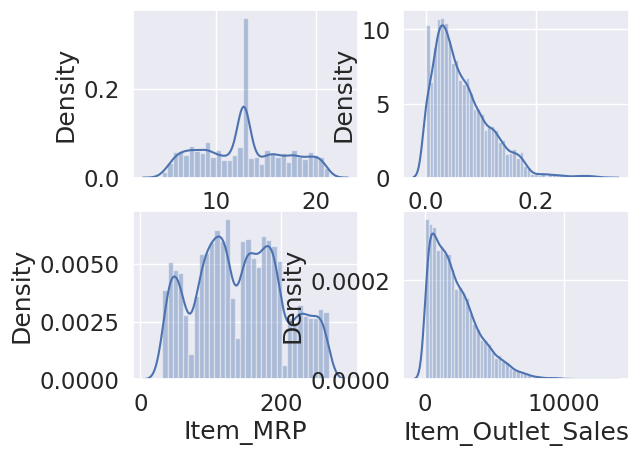

In [43]:
num_cols=['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']
it=1

for i in num_cols:
    plt.subplot(2,2,it)
    sns.distplot(df[i])
    it+=1
plt.show()

Bivariate Analysis

In [44]:
df.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.047101,-0.111079,-0.040775,-0.012048,0.010743,-0.001089,-0.002954,0.002581,-0.002473,-0.004532,0.002869
Item_Weight,0.047101,1.000000,-0.030101,-0.013641,0.028637,0.033002,0.003274,0.000462,0.001580,-0.002104,0.001699,0.011083
Item_Fat_Content,-0.111079,-0.030101,1.000000,0.044274,-0.147733,-0.004019,-0.001095,0.000137,-0.000634,0.001373,-0.000228,0.018719
Item_Visibility,-0.040775,-0.013641,0.044274,1.000000,-0.035646,-0.006351,-0.106181,-0.083678,0.064836,-0.017362,-0.165726,-0.128625
Item_Type,-0.012048,0.028637,-0.147733,-0.035646,1.000000,0.043948,0.001126,0.003061,-0.002608,0.002083,0.004305,0.017048
Item_MRP,0.010743,0.033002,-0.004019,-0.006351,0.043948,1.000000,-0.000555,0.000141,-0.001018,0.000838,0.000136,0.567574
Outlet_Identifier,-0.001089,0.003274,-0.001095,-0.106181,0.001126,-0.000555,1.000000,0.079047,0.504580,-0.716151,0.099899,0.162325
Outlet_Establishment_Year,-0.002954,0.000462,0.000137,-0.083678,0.003061,0.000141,0.079047,1.000000,0.193392,-0.089328,-0.122519,-0.049135
Outlet_Size,0.002581,0.001580,-0.000634,0.064836,-0.002608,-0.001018,0.504580,0.193392,1.000000,-0.614300,-0.201505,-0.086182
Outlet_Location_Type,-0.002473,-0.002104,0.001373,-0.017362,0.002083,0.000838,-0.716151,-0.089328,-0.614300,1.000000,0.467251,0.089367


<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

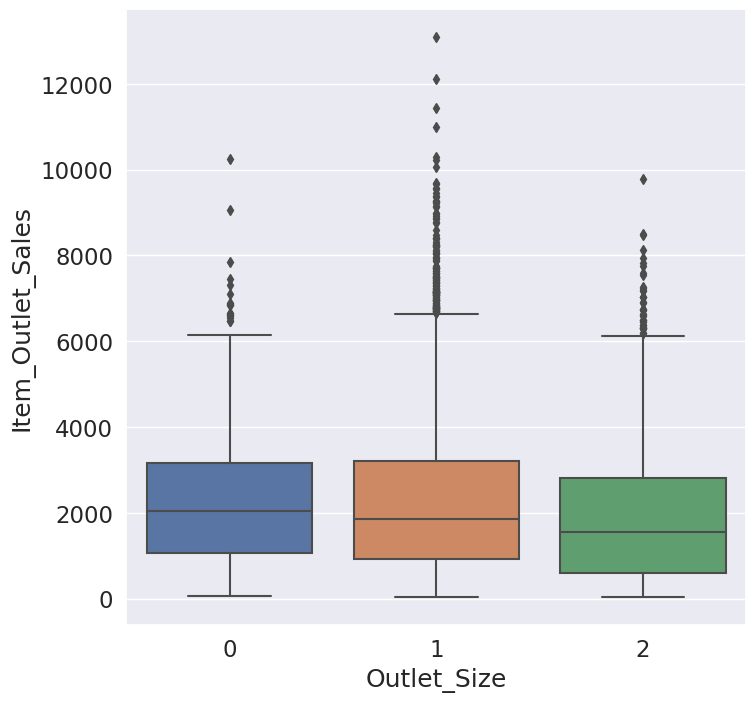

In [45]:

plt.figure(figsize=(8,8))
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df)

<Axes: xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

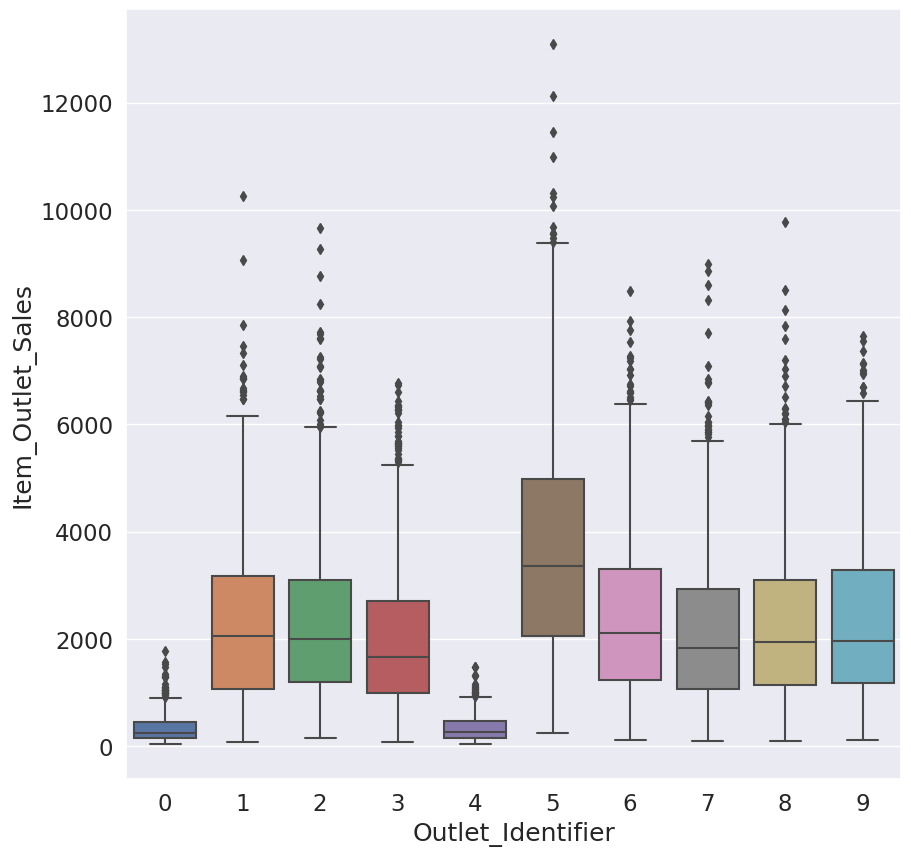

In [46]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=df)

<Axes: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

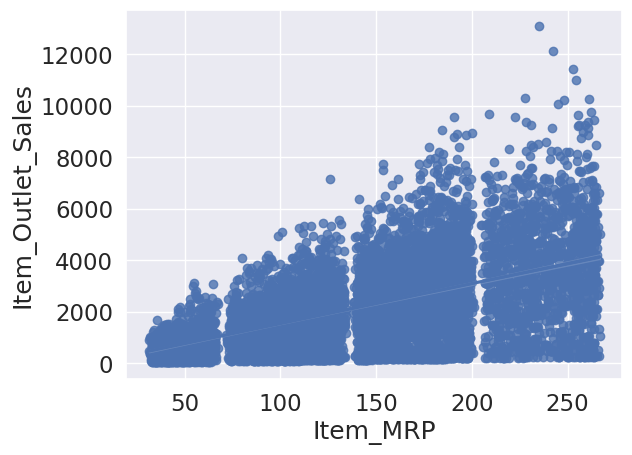

In [47]:

sns.regplot(x='Item_MRP',y='Item_Outlet_Sales',data=df)

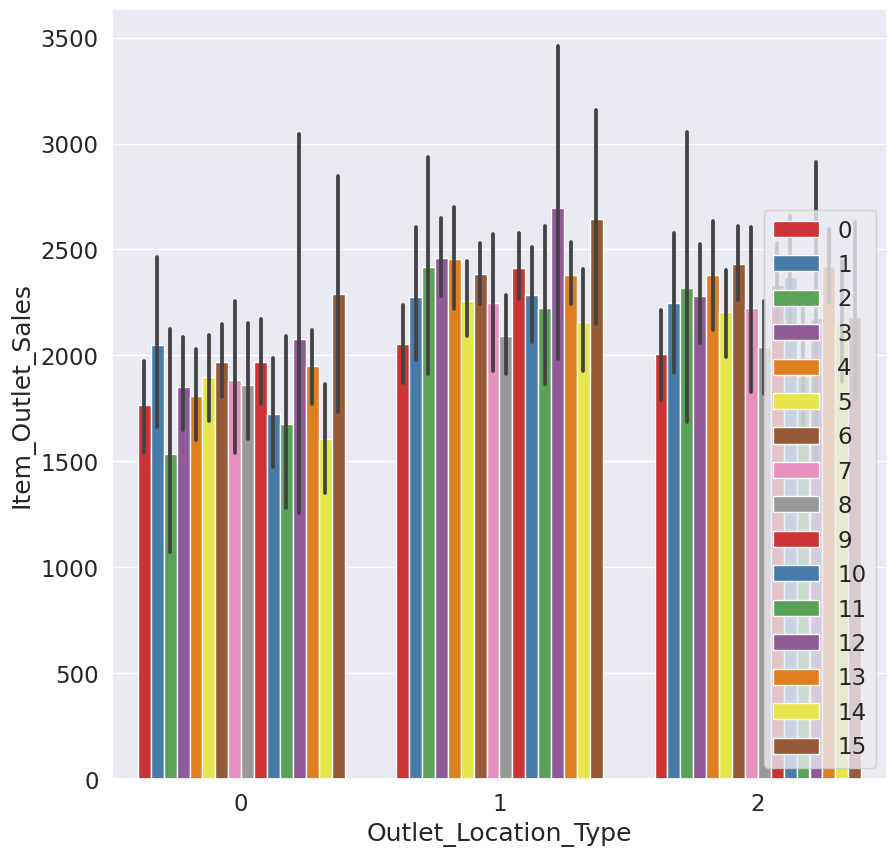

In [48]:
plt.figure(figsize=(10,10))
sns.barplot(data=df,x='Outlet_Location_Type',y='Item_Outlet_Sales',hue='Item_Type',palette='Set1')
plt.legend()

In [49]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [123]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics



In [124]:
encoder = LabelEncoder()
df_train['Item_Identifier'] = encoder.fit_transform(df_train['Item_Identifier'])

df_train['Item_Fat_Content'] = encoder.fit_transform(df_train['Item_Fat_Content'])

df_train['Item_Type'] = encoder.fit_transform(df_train['Item_Type'])

df_train['Outlet_Identifier'] = encoder.fit_transform(df_train['Outlet_Identifier'])

df_train['Outlet_Size'] = encoder.fit_transform(df_train['Outlet_Size'])

df_train['Outlet_Location_Type'] = encoder.fit_transform(df_train['Outlet_Location_Type'])

df_train['Outlet_Type'] = encoder.fit_transform(df_train['Outlet_Type'])

In [126]:
X = df_train.drop(columns='Item_Outlet_Sales', axis=1)
Y = df_train['Item_Outlet_Sales']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


In [127]:
regressor = XGBRegressor()
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [128]:

training_data_prediction = regressor.predict(X_train)
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R Squared value = ', r2_train)

R Squared value =  0.8579898595703999


In [129]:
test_data_prediction = regressor.predict(X_test)

r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [130]:
print('R Squared value = ', r2_test)

R Squared value =  0.5358371178322245
